<a href="https://colab.research.google.com/github/shwe-hg/Capstone-project-on-unsupervised-Ml-/blob/main/project_on_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NETFLIX MOVIES AND TV SHOWS CLUSTERING** 

### Project Type : Unsupervised ML


### Contribution : Individual 

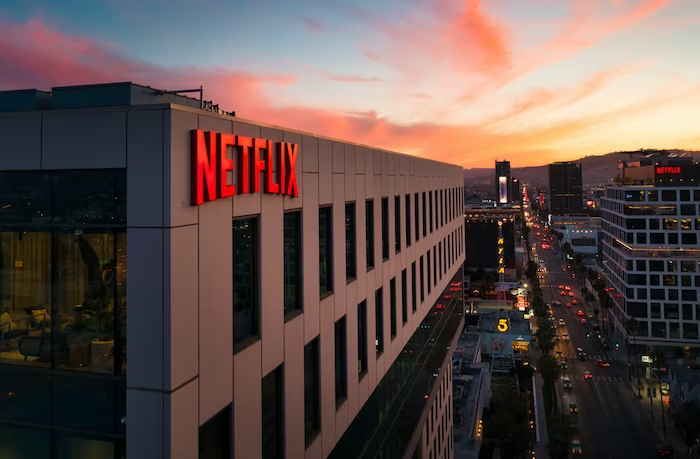

## Project summary :

This project consists of a dataset of Tv shows and movies available on Netflix as of 2019. They released an interesting report which shows that the number of tv shows on Netflix has nearly tripled since 2010 and the movies number is decreasedby more than 2000 titlessince 2010 .


While its Tv shows has nearly tripled . It will be interesting to explore what all other information can we obtain by the dataset .


**In this project, you are required to do **

1.Exploratory Data Analysis.


2.Understanding what type content is available in different countries

3.Is Netflix has increasingly focusing on TV rather than movies in recent years.

4.Clustering similar content by matching text-based features

## GitHub Link :                   


GitHub Link - 

## About the dataset :

We have the data which contains details about show id , type , title director , cast , country , release year , rating , duration etc .




### Dataset info :

Number of columns - 12 

Number of rows - 7787 

### Dataset Description :

1 .**show_id**: Unique ID for every Movie / Tv Show

2 .**type**: Identifier - A Movie or TV Show

3 .**title**: Title of the Movie / Tv Show

4 .**director**: Director of the Movie

5 .**cast**: Actors involved in the movie / show

6 .**country**: Country where the movie / show was produced

7 .**date_added**: Date it was added on Netflix

8 .**release_year**: Actual Releaseyear of the movie / show

9 .**rating**: TV Rating of the movie / show

10 .**duration**: Total Duration - in minutes or number of seasons

11 .**listed_in**: Genere

12 .**description**: The Summary description

###Importing all libraries :

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# mounting the google drive to access the files 
from google.colab import drive 
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Loading the dataset**

In [23]:
# loading dataset 
df=pd.read_csv("/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [24]:
# first 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [25]:
#last 5 rows
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [26]:
# shape of dataset
df.shape

(7787, 12)

In [27]:
#info about columns 
df.columns 

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [28]:
# info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [29]:
# making a copy of dataset so that original dataset remain unchanged.
df1=df.copy()

###Duplicate Values 

In [30]:
d_value=df1[df1.duplicated()].shape
print("the no of duplicate values is",d_value)

the no of duplicate values is (0, 12)


We found that there is no duplicate values in the above dataset .

###Missing values / Null values 

In [31]:
df1.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,False,False,False,False,False,False,False,False,False,False,False,False
7783,False,False,False,False,False,False,False,False,False,False,False,False
7784,False,False,False,True,False,True,False,False,False,False,False,False
7785,False,False,False,True,False,False,False,False,False,False,False,False


In [32]:
df1.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [33]:
df1.isnull().sum().sort_values(ascending=False)[:6]

director      2389
cast           718
country        507
date_added      10
rating           7
show_id          0
dtype: int64

In [34]:
# Missing Values Percentage
round(df1.isna().sum()/len(df1)*100, 2)
     

show_id          0.00
type             0.00
title            0.00
director        30.68
cast             9.22
country          6.51
date_added       0.13
release_year     0.00
rating           0.09
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

<Axes: >

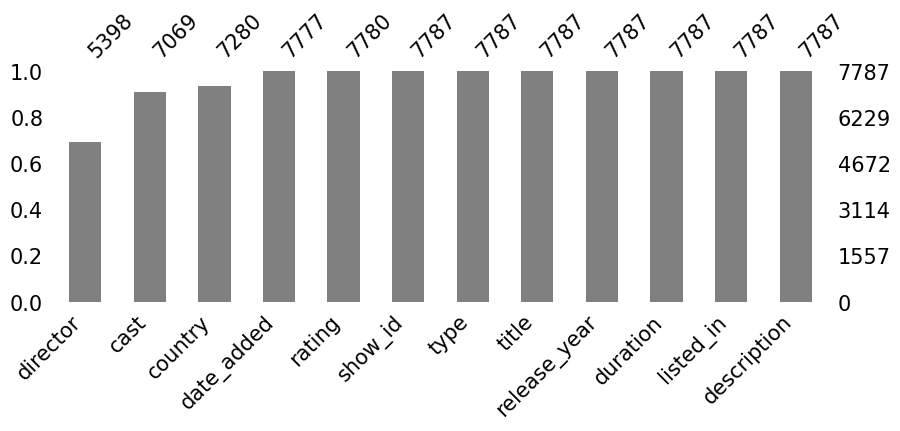

In [35]:
# Visualizing the missing values
import missingno as msno
msno.bar(df1, color='grey',sort='ascending', figsize=(10,3), fontsize=15)

In [36]:
# Filling all the missing values with unknown
df1.fillna("Unknown",inplace=False)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,Unknown,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [37]:
#After dropping the null values the shape of dataset . 
df1.shape

(7787, 12)

In [38]:
df1.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


Getting the data type of dataset .

In [39]:
df1.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object




## **Data Visualization** 

In [52]:
df1['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

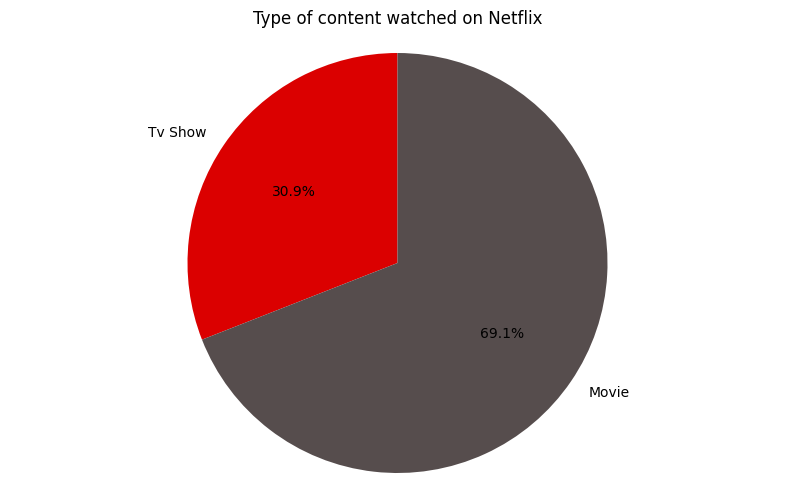

In [53]:
import matplotlib.pyplot as plt

# Data
labels = ['Tv Show', 'Movie']
sizes = [tv_show, movie]
colors = ['#db0000', '#564d4d']

# Create pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Type of content watched on Netflix")

# Display the chart
plt.axis('equal')
plt.show()

**Observation** :



**From the graph we can clearly say that number of movies are approximately twice the number of tv shows.**

***In our dataset we have around 69% content as movies and remaining 31% as TV shows.***

***Here we have more numberes of Movies than TV shows***

In [54]:
df1['title'].nunique()

7787

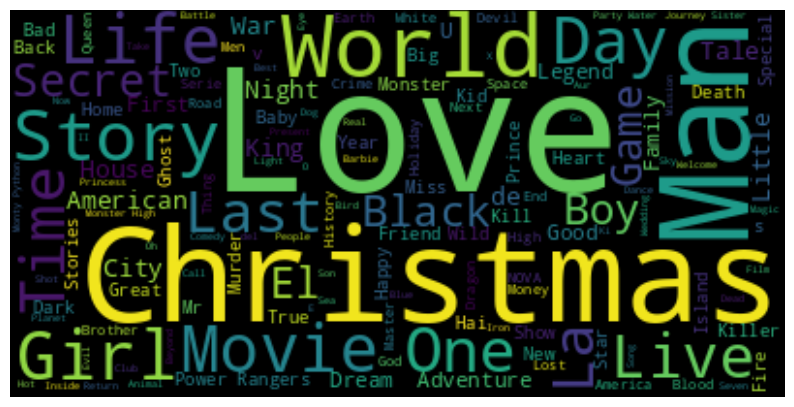

In [55]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Word cloud for title
title_word_cloud = df1['title']
text_title = " ".join(word for word in title_word_cloud)
stopwords = set(STOPWORDS)
wordcloud_title = WordCloud(stopwords = stopwords, background_color="black").generate(text_title)
plt.rcParams["figure.figsize"] = (10,6)
plt.imshow(wordcloud_title, interpolation = 'bilinear')
plt.axis("off")
plt.show()

**Observation**:

**The words like 'christmas' , 'black live',    'love', 'one', 'world',   'man',  'life' were used frequently.**

In [56]:
print(f'number of unique directors : {df1.director.nunique()}')
print(f'null values in the column : {df1.director.isna().sum()}')
     

number of unique directors : 4049
null values in the column : 2389


In [57]:
print(f"number of movie directed by director is : { df1[df1['type']=='TV Show']['director'].value_counts().sum()}")
print(f"number of TV show directed by director is : { df1[df1['type']=='Movie']['director'].value_counts().sum()}")
     

number of movie directed by director is : 184
number of TV show directed by director is : 5214


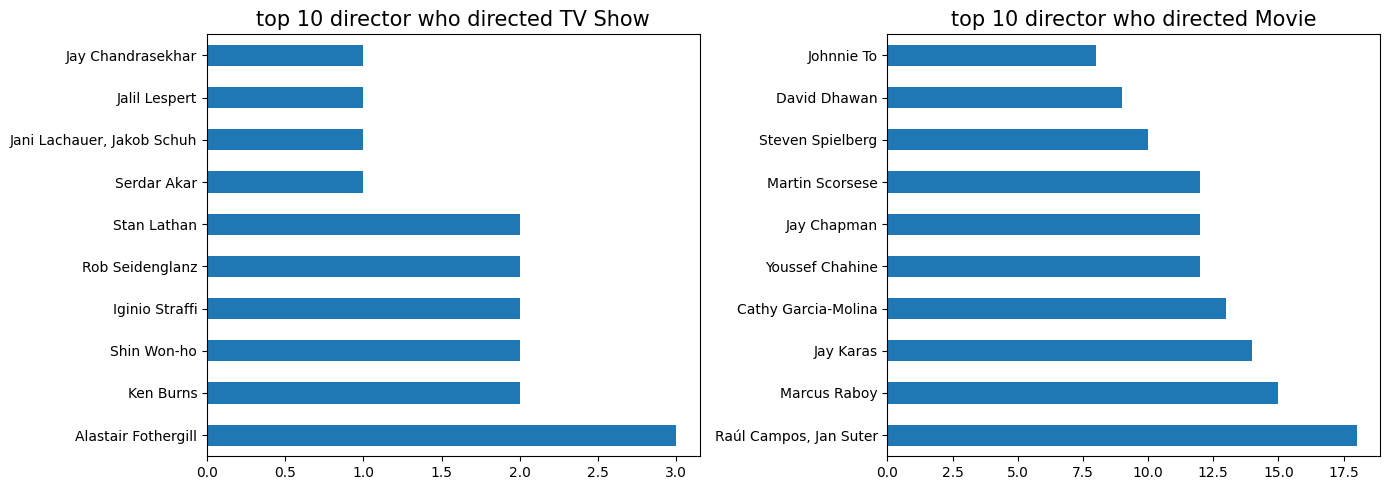

In [58]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# top 10 director who directed TV show are
show = df1[df1['type']=='TV Show']['director'].value_counts()[:10].plot(kind='barh', ax=ax[0])
show.set_title('top 10 director who directed TV Show', size=15)

# top 10 director who directed movie are
movie = df1[df1['type']=='Movie']['director'].value_counts()[:10].plot(kind='barh', ax=ax[1])
movie.set_title('top 10 director who directed Movie', size=15)

plt.tight_layout()
plt.show()
     

**Observations:**

****The three shows directed by Alastair Fothergill are the highest than any other shows**** .



****Both, Jan Suter and Raul Campos have directed 18 films, more than anyone else in the list of dataset**** .

In [59]:
df1['cast']

0       João Miguel, Bianca Comparato, Michel Gomes, R...
1       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3       Elijah Wood, John C. Reilly, Jennifer Connelly...
4       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
                              ...                        
7782    Imad Creidi, Antoinette Turk, Elias Gergi, Car...
7783    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
7784                                              Nasty C
7785                           Adriano Zumbo, Rachel Khoo
7786                                                  NaN
Name: cast, Length: 7787, dtype: object

In [60]:
# seperating actors from cast column
cast = df1['cast'].str.split(', ', expand=True).stack()
cast.value_counts()
# top actors name who play highest role in movie/show.

Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    30
Om Puri             30
Akshay Kumar        29
                    ..
Archie Alemania      1
Demore Barnes        1
Marty Adams          1
Nicole Boivin        1
Rachel Khoo          1
Length: 32881, dtype: int64

In [61]:
print(f"number actor in the tv shows : {len(df[df['type']=='TV Show']['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts())}")
print(f"number of actor in the movies : {len(df[df['type']=='Movie']['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts())}")
     

number actor in the tv shows : 13585
number of actor in the movies : 23049


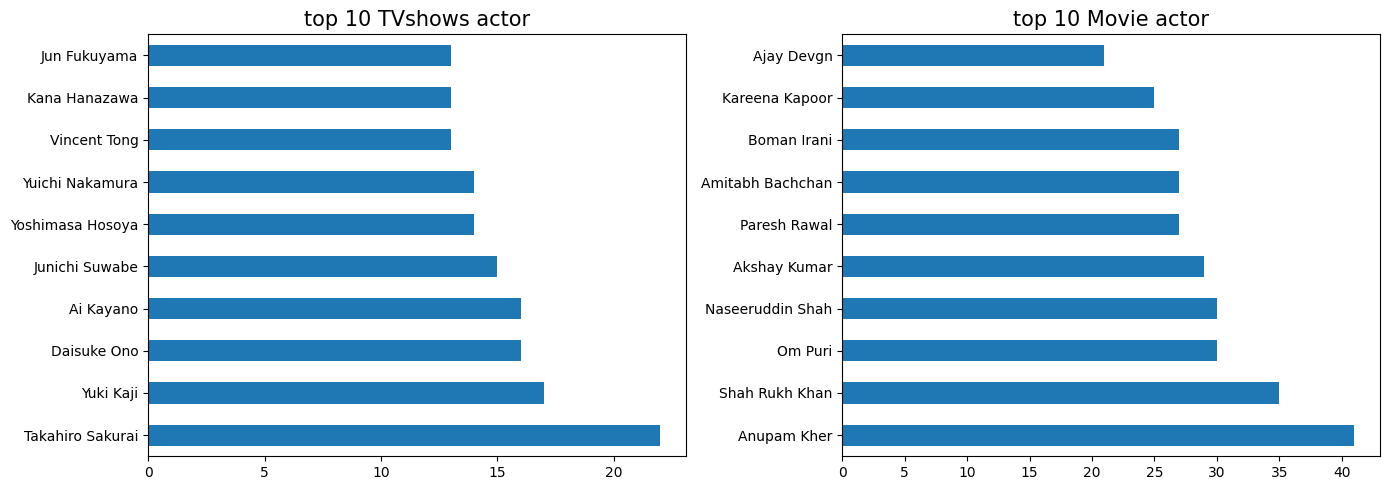

In [62]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# seperating TV shows actor from cast column
top_TVshows_actor = df1[df1['type']=='TV Show']['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
# plotting actor who appered highest number of TV Show
a = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0])
a.set_title('top 10 TVshows actor', size=15)

# seperating movie actor from cast column
top_movie_actor = df1[df1['type']=='Movie']['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
# plotting actor who appered highest number of Movie
b = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1])
b.set_title('top 10 Movie actor', size=15)

plt.tight_layout()
plt.show()
     

**Observation** :

****Anupam Kher, Shahrukh Khan, Om Puri play highest number of role in the movies****.


****Takahiro Sakurai, Yuki Kaji, Daisuke Ono play highest role in the TV shows****.

In [63]:
df1['country']

0                                                  Brazil
1                                                  Mexico
2                                               Singapore
3                                           United States
4                                           United States
                              ...                        
7782    Sweden, Czech Republic, United Kingdom, Denmar...
7783                                                India
7784                                                  NaN
7785                                            Australia
7786                United Kingdom, Canada, United States
Name: country, Length: 7787, dtype: object

In [64]:
df1['country'].nunique()

681

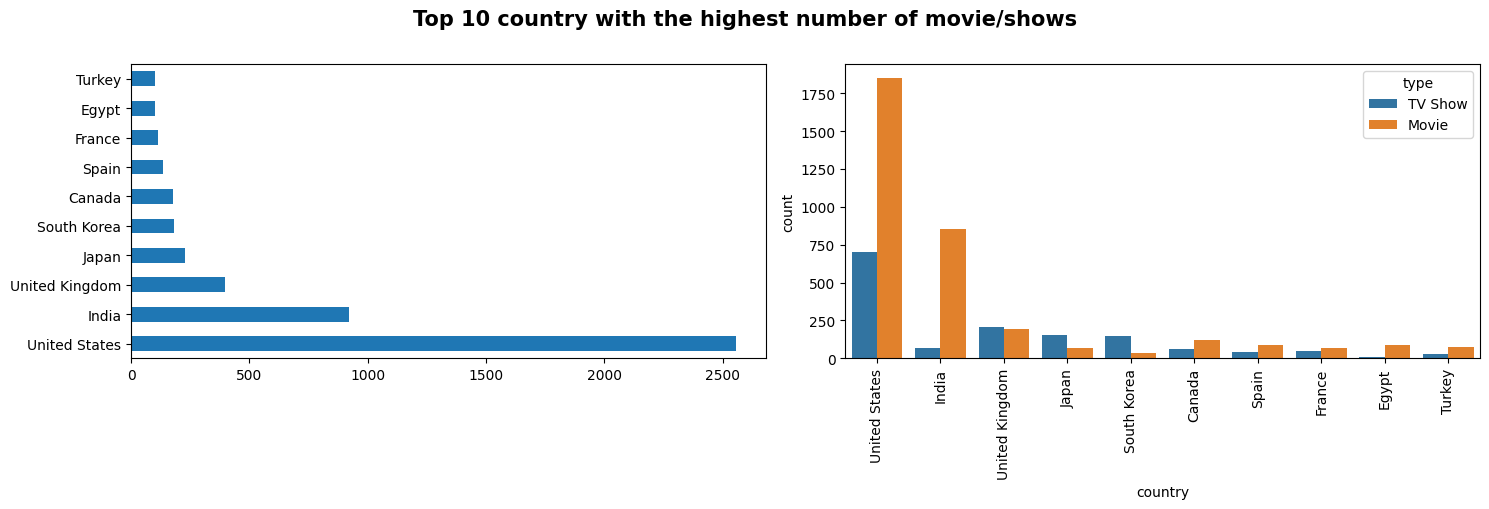

In [65]:
fig,ax = plt.subplots(1,2, figsize=(15,5))
plt.suptitle('Top 10 country with the highest number of movie/shows', weight='bold', size=15, y=1.01)

# univariate analysis
df1['country'].value_counts().nlargest(10).plot(kind='barh', ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="country", data=df1, hue='type', order=df1['country'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Observation**: 

****The highest number of movies / TV shows were from US, followed by India and UK****.

****And we can clear see that movies are having more number than tv shows from these countries**** .

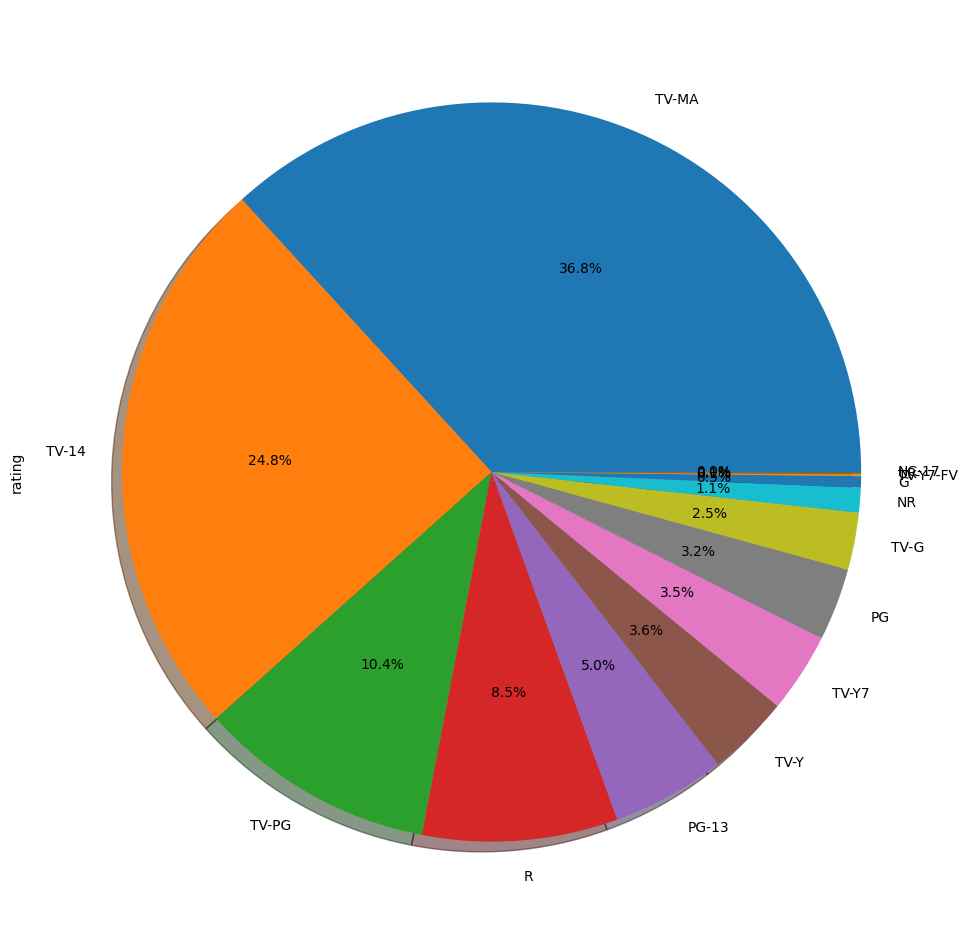

In [66]:
df1['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(15,12))
plt.show()

**Observation** :   


****From the pie chart we can say that TV-MA is having highest rating i.e 36.8% followed by TV-14 with 24.8%****.

In [67]:
len(genres)

NameError: ignored

In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='black',
                          width=900,
                          height=900).generate(" ".join(df.listed_in))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('genres.png')
plt.show()

**Observation**:

****The genres present in the dataset are 'comedy shows ' , 'romantic' , 'adventure' ,'documentaries' , 'International movies ','kids','frictional' etc****.

In [ ]:
genres = df1['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# top 10 genre in listed movie/show
genres = genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})
genres[:10]

**Observation** :                       

****The genre 'International movies' is having highest count i.e 2437 followed by 'Dramas' i.e 2106**** .

In [ ]:
df1['duration']

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(15,5))
plt.suptitle('the duration of the shows or movies', weight='bold', size=15, y=1.01)
df1['duration'].value_counts().nlargest(10).plot(kind='barh', ax=ax[0])

graph = sns.countplot(x="duration", data=df1, hue='type', order=df1['duration'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


**Observation** :                            

****Most of the shows having 1 seasons , some have 2 seasons , and very few is having 3 seasons**** .


****The largest length of the movies is 97 min****.

****The duration of the movies lies between 90 to 97 min**** .

In [ ]:
df1['release_year']

In [ ]:
df1['release_year'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(15,15))
plt.show()

**Observation**  :                           

****The pie chart clearly shows that 2018 is having a highest release rate compared to other year**** .


In [ ]:
fig,ax = plt.subplots(1,2, figsize=(15,5))
plt.suptitle('Graph of year in which tv shows and movies are released ', weight='bold', size=15, y=1.01)
df1['release_year'].value_counts().nlargest(10).plot(kind='barh', ax=ax[0])

graph = sns.countplot(x="release_year", data=df1, hue='type', order=df1['release_year'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


**Observation** :                  

***Graph shows that regardless of year ,  no of movies released is more than that of tv shows , except for year 2020***.

In [ ]:
# number of unique values
df1.rating.nunique()

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(15,6))
plt.suptitle('Top 10 rating given for movie and shows', weight='bold', y=1.02, size=15)

# univariate analysis
sns.countplot(x="rating", data=df1, order=df1['rating'].value_counts().index[0:10], ax=ax[0])

# bivariate analysis
# relationship between type and rating
graph = sns.countplot(x="rating", data=df1, hue='type', order=df1['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()
     



**Observation**






**The majority of Movies and TV shows have a rating of TV-MA, which stands for "Mature Audience" and followed by TV-14, which stands for "Younger Audience."**


**As we can see from the graph that the rating of movies is higher than tv shows .**


In [ ]:
df1['listed_in'].head()

In [ ]:

# seperating genre from listed_in columns for analysis purpose
genres = df1['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# top 10 genre in listed movie/show
genres = genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})
genres[:10]

In [ ]:
# number of genres present in dataset 
len(genres)

In [ ]:
# number of listed_in present in dataset 
len('listed_in')

In [ ]:
# text documents
text = " ".join(word for word in df1['description'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.show()

**Observation**

**The most frequently used words in the description column are "family," "find," "life," "love," "new world," and "friend."**

##**Handling Outliers**

In [ ]:
# boxplot for outlier detection
sns.boxplot(data=df1)

**Data Preprocessing:**

In [ ]:
cluster_df = df1[['title']]
cluster_df['cluster_data'] = (df1['description'] + ' ' + df1['listed_in'] + ' ' + df1['director'] + ' ' + df1['cast'] + ' ' + df1['country'] + ' ' + df1['rating']).astype(str)
cluster_df.set_index('title', inplace = True)
cluster_df.head()
cluster_df.head()
     